In [1]:
# Manipulação e análise
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração de visualização
%matplotlib inline
sns.set(style='whitegrid')

# Evitar warnings desnecessários
import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv("C:/Users/gusta/portfolio_gustavo/projetos/analise_vendas_python/data.csv", encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
# Verificando informações básicas do dataframe
df.info()

# Verificando valores ausentes
print("\nValores ausentes por coluna:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB

Valores ausentes por coluna:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [6]:
# Removendo registros sem CustomerID
df = df.dropna(subset=["CustomerID"])

# Convertendo CustomerID para inteiro
df["CustomerID"] = df["CustomerID"].astype(int)

# Convertendo InvoiceDate para datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Criando a coluna de total da venda
df["TotalVenda"] = df["Quantity"] * df["UnitPrice"]

# Exibindo as 5 primeiras linhas após a limpeza
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalVenda
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [7]:
vendas_por_pais = df.groupby("Country")["TotalVenda"].sum().sort_values(ascending=False)
print(vendas_por_pais.head(10))


Country
United Kingdom    6767873.394
Netherlands        284661.540
EIRE               250285.220
Germany            221698.210
France             196712.840
Australia          137077.270
Switzerland         55739.400
Spain               54774.580
Belgium             40910.960
Sweden              36595.910
Name: TotalVenda, dtype: float64


In [8]:
quantidade_por_pais = df.groupby("Country")["Quantity"].sum().sort_values(ascending=False)
print(quantidade_por_pais.head(10))


Country
United Kingdom    4008533
Netherlands        200128
EIRE               136329
Germany            117448
France             109848
Australia           83653
Sweden              35637
Switzerland         29778
Spain               26824
Japan               25218
Name: Quantity, dtype: int64


In [9]:
top_clientes = df.groupby("CustomerID")["TotalVenda"].sum().sort_values(ascending=False).head(10)
print(top_clientes)


CustomerID
14646    279489.02
18102    256438.49
17450    187482.17
14911    132572.62
12415    123725.45
14156    113384.14
17511     88125.38
16684     65892.08
13694     62653.10
15311     59419.34
Name: TotalVenda, dtype: float64


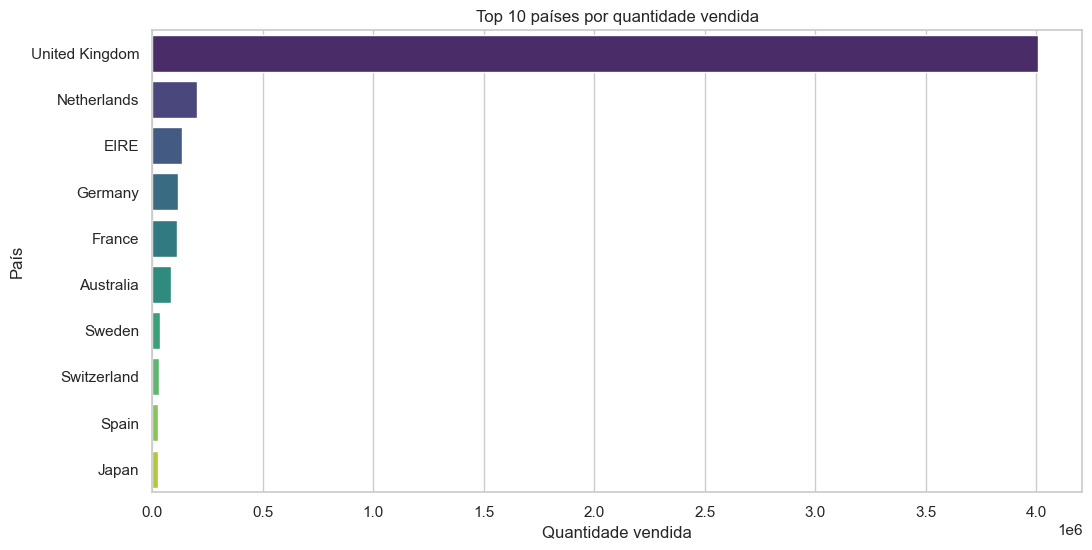

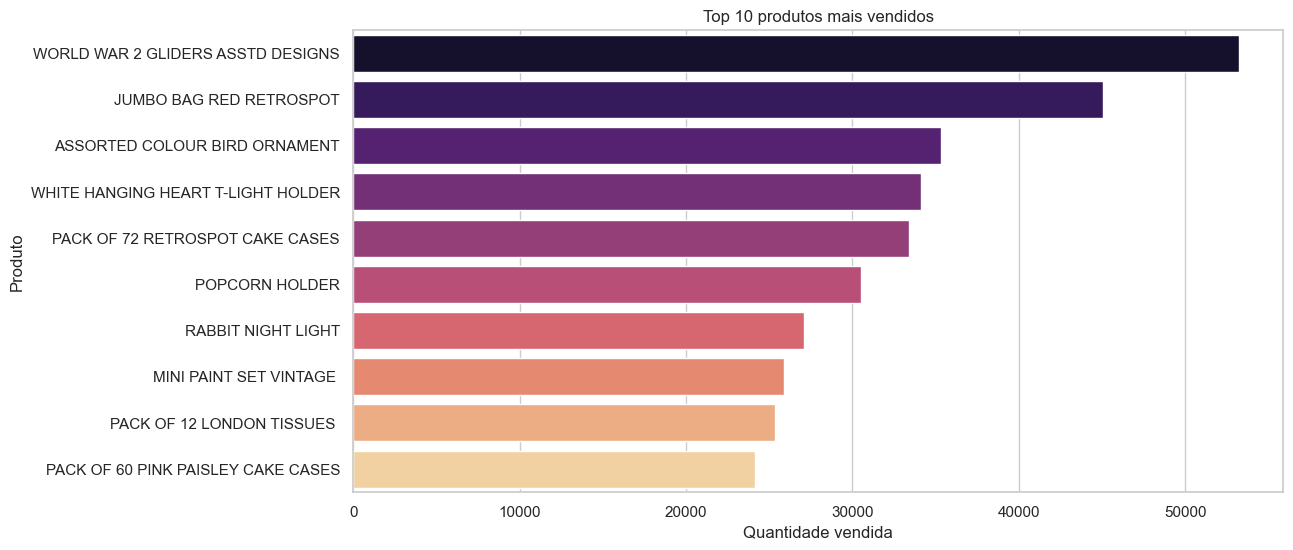

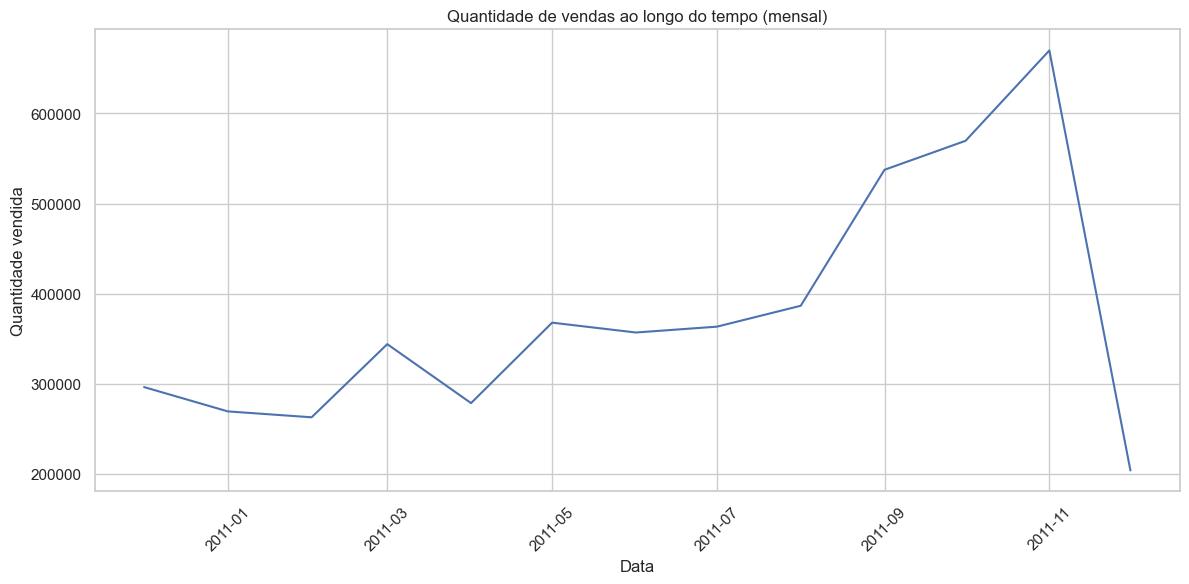

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Vendas por país
vendas_pais = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=vendas_pais.values, y=vendas_pais.index, palette='viridis')
plt.title('Top 10 países por quantidade vendida')
plt.xlabel('Quantidade vendida')
plt.ylabel('País')
plt.show()

# 2. Produtos mais vendidos
produtos = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=produtos.values, y=produtos.index, palette='magma')
plt.title('Top 10 produtos mais vendidos')
plt.xlabel('Quantidade vendida')
plt.ylabel('Produto')
plt.show()

# 3. Vendas ao longo do tempo
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
vendas_tempo = df.groupby(df['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()
vendas_tempo.index = vendas_tempo.index.to_timestamp()

plt.figure(figsize=(14,6))
sns.lineplot(x=vendas_tempo.index, y=vendas_tempo.values)
plt.title('Quantidade de vendas ao longo do tempo (mensal)')
plt.xlabel('Data')
plt.ylabel('Quantidade vendida')
plt.xticks(rotation=45)
plt.show()


In [11]:
# Converter InvoiceDate para datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Criar coluna 'TotalPrice'
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Agrupar por dia e somar TotalPrice
vendas_diarias = df.groupby(df['InvoiceDate'].dt.date)['TotalPrice'].sum().reset_index()

# Renomear colunas
vendas_diarias.columns = ['Date', 'TotalSales']

# Converter 'Date' para datetime de novo
vendas_diarias['Date'] = pd.to_datetime(vendas_diarias['Date'])

# Definir o índice para série temporal
vendas_diarias.set_index('Date', inplace=True)

# Visualizar as primeiras linhas
print(vendas_diarias.head())


            TotalSales
Date                  
2010-12-01    46051.26
2010-12-02    45775.43
2010-12-03    22598.46
2010-12-05    31380.60
2010-12-06    30465.08


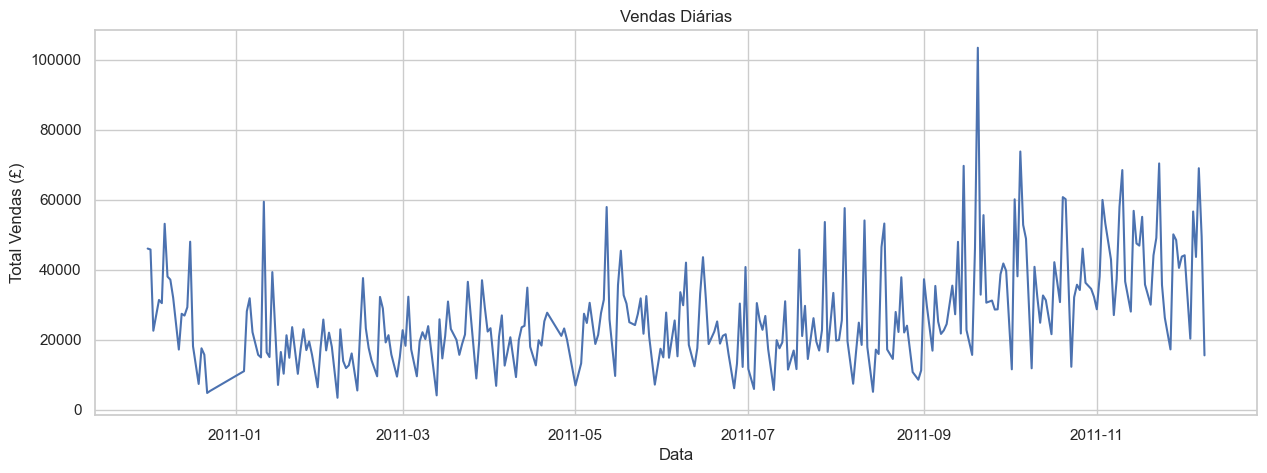

In [12]:
plt.figure(figsize=(15,5))
plt.plot(vendas_diarias.index, vendas_diarias['TotalSales'])
plt.title('Vendas Diárias')
plt.xlabel('Data')
plt.ylabel('Total Vendas (£)')
plt.show()


In [13]:
pip install prophet



   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/13.3 MB 4.3 MB/s eta 0:00:04
   --- ------------------------------------ 1.2/13.3 MB 15.9 MB/s eta 0:00:01
   -------------- ------------------------- 4.8/13.3 MB 38.7 MB/s eta 0:00:01
   ----------------------------- ---------- 9.9/13.3 MB 57.5 MB/s eta 0:00:01
   ---------------------------------------  13.3/13.3 MB 93.9 MB/s eta 0:00:01
   ---------------------------------------- 13.3/13.3 MB 72.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/94.5 kB ? eta -:--:--
   ---------------------------------------- 94.5/94.5 kB ? eta 0:00:00
   ---------------------------------------- 0.0/991.0 kB ? eta -:--:--
   --------------------------------------- 991.0/991.0 kB 65.4 MB/s eta 0:00:00


In [14]:
from prophet import Prophet

# Preparar o dataframe para Prophet
df_prophet = vendas_diarias.reset_index().rename(columns={'Date': 'ds', 'TotalSales': 'y'})

# Instanciar e ajustar o modelo
model = Prophet()
model.fit(df_prophet)


23:25:39 - cmdstanpy - INFO - Chain [1] start processing
23:25:40 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
# Criar dataframe para os próximos 30 dias
future = model.make_future_dataframe(periods=30)

# Fazer previsão
forecast = model.predict(future)

# Mostrar as previsões
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


            ds          yhat    yhat_lower    yhat_upper
330 2012-01-04  49355.457204  34973.253782  63830.043960
331 2012-01-05  56517.373627  42916.376837  69346.432925
332 2012-01-06  45155.658975  30651.265552  57795.998324
333 2012-01-07  60363.449554  46514.013723  73384.544969
334 2012-01-08  36594.837778  22092.783250  50454.428657


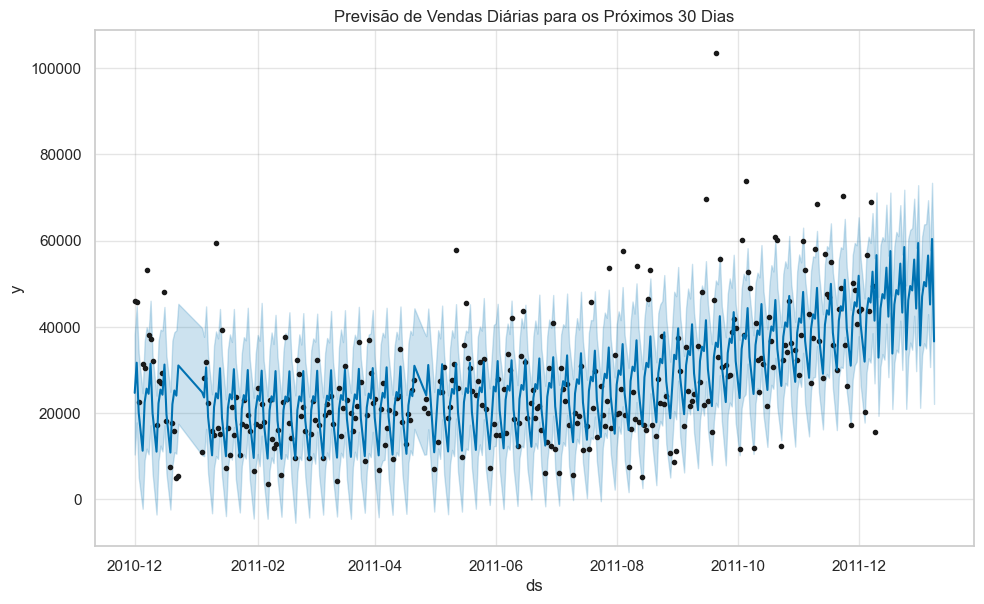

In [16]:
fig = model.plot(forecast)
plt.title('Previsão de Vendas Diárias para os Próximos 30 Dias')
plt.show()


In [17]:
# Converter InvoiceDate para datetime (se ainda não fez)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True)

# Data de referência (data final da análise)
data_ref = df['InvoiceDate'].max()

# Definir janela de churn (exemplo: 90 dias)
janela_churn = pd.Timedelta(days=90)

# Última compra de cada cliente
ultima_compra = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()

# Marcar se o cliente fez compra nos últimos 90 dias
ultima_compra['churn'] = ultima_compra['InvoiceDate'] < (data_ref - janela_churn)

# Clientes que deram churn
churn_clients = ultima_compra[ultima_compra['churn'] == True]
print(f'Total clientes com churn: {churn_clients.shape[0]}')

# Clientes ativos
ativos = ultima_compra[ultima_compra['churn'] == False]
print(f'Total clientes ativos: {ativos.shape[0]}')


Total clientes com churn: 1454
Total clientes ativos: 2918


In [18]:
# Criar dataframe base com total comprado e valor gasto por cliente
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

perfil_cliente = df.groupby('CustomerID').agg(
    total_quantidade = ('Quantity', 'sum'),
    total_valor = ('TotalPrice', 'sum'),
    frequencia = ('InvoiceNo', 'nunique')  # número de compras distintas
).reset_index()

# Unir com o churn (ativo ou não)
perfil_cliente = perfil_cliente.merge(ultima_compra[['CustomerID', 'churn']], on='CustomerID', how='left')

# Visualizar amostra
perfil_cliente.head()


,CustomerID,total_quantidade,total_valor,frequencia,churn
0,12346,0,0.00,2,True
1,12347,2458,4310.00,7,False
2,12348,2341,1797.24,4,False
3,12349,631,1757.55,1,False
4,12350,197,334.40,1,True


In [19]:
# Média dos indicadores por grupo churn (True = churn, False = ativo)
media_por_grupo = perfil_cliente.groupby('churn').mean()[['total_quantidade', 'total_valor', 'frequencia']]

print(media_por_grupo)


       total_quantidade  total_valor  frequencia
churn                                           
False       1508.176833  2557.666776    6.542838
True         348.024759   575.511803    2.130674


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Definir features e target
X = perfil_cliente[['total_quantidade', 'total_valor', 'frequencia']]
y = perfil_cliente['churn']

# Dividir em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [21]:
# Criar modelo
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [22]:
# Prever no conjunto de teste
y_pred = clf.predict(X_test)

# Matriz de confusão e relatório
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[766 112]
 [264 170]]
              precision    recall  f1-score   support

       False       0.74      0.87      0.80       878
        True       0.60      0.39      0.47       434

    accuracy                           0.71      1312
   macro avg       0.67      0.63      0.64      1312
weighted avg       0.70      0.71      0.69      1312



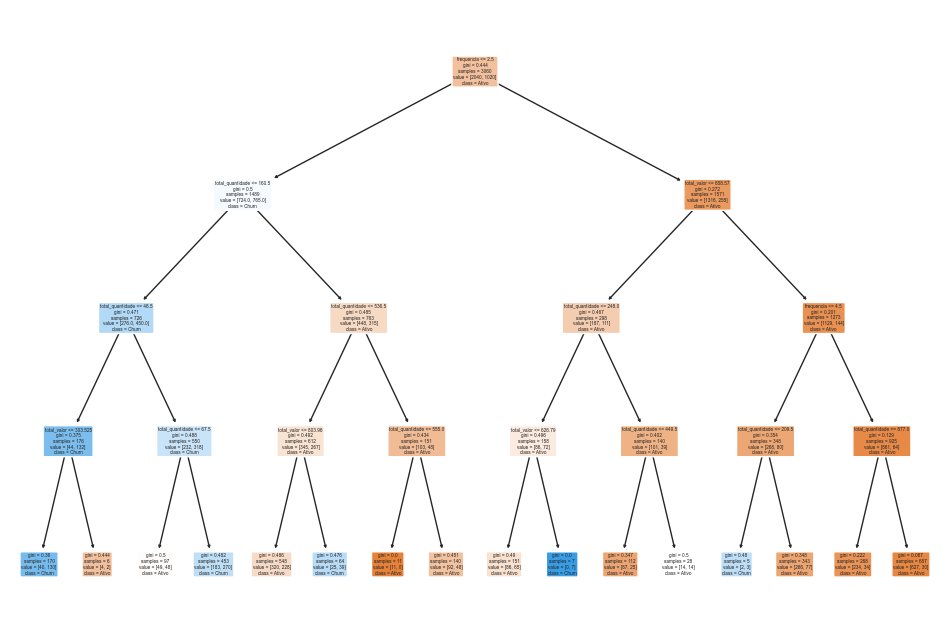

In [23]:
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=X.columns, class_names=['Ativo', 'Churn'], filled=True, rounded=True)
plt.show()
